<a href="https://colab.research.google.com/github/babaroscopy/ML/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
%matplotlib inline 

In [2]:
df=pd.read_csv("wfp_food_prices_pakistan.csv", delimiter=",")
df.shape

(7663, 17)

In [3]:
del df['default']

In [4]:
df.dropna(inplace=True)
df.head(4)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
4,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.5,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5


In [5]:
from sklearn import preprocessing
label_enco = preprocessing.LabelEncoder()
d = df.select_dtypes(include=['object'])
for i in d.columns:
    df[i]=label_enco.fit_transform(df[i])

In [6]:
Y=df['price']
del df['price']
X=df

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [8]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [9]:
finalDf = pd.concat([principalDf, Y], axis = 1)

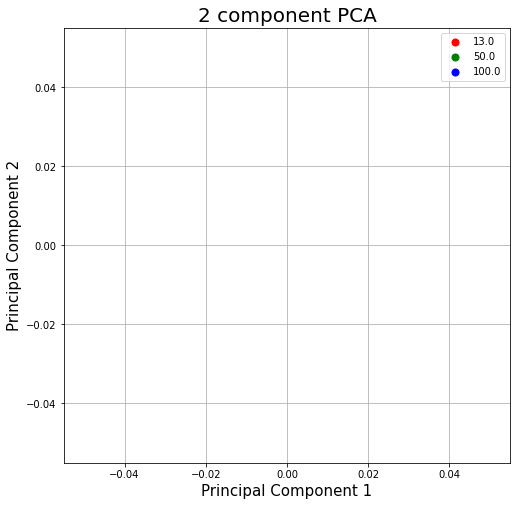

In [12]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['13.0', '50.0', '100.0']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['price'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [13]:
pca.explained_variance_ratio_

array([0.35076589, 0.23509138])

In [14]:
dataf=pd.read_csv("wfp_food_prices_pakistan.csv", delimiter=",")
dataf.shape

(7663, 17)

In [15]:
del dataf['default']

In [16]:
dataf.dropna(inplace=True)
dataf.head(4)

,date,cmname,unit,category,price,currency,country,admname,adm1id,mktname,mktid,cmid,ptid,umid,catid,sn
1,2004-01-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
2,2004-02-15,Wheat flour - Retail,KG,cereals and tubers,13.0,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
3,2004-03-15,Wheat flour - Retail,KG,cereals and tubers,14.25,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5
4,2004-04-15,Wheat flour - Retail,KG,cereals and tubers,12.5,PKR,Pakistan,Balochistan,2272,Quetta,295.0,58,15.0,5.0,1,295_58_15_5


In [17]:
y=dataf['cmname']
del dataf['cmname']
x=dataf

In [18]:
from sklearn import preprocessing
label_enco = preprocessing.LabelEncoder()
d = x.select_dtypes(include=['object'])
for i in x.columns:
    x[i]=label_enco.fit_transform(x[i])

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [20]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [21]:
finalDf = pd.concat([principalDf, Y], axis = 1)

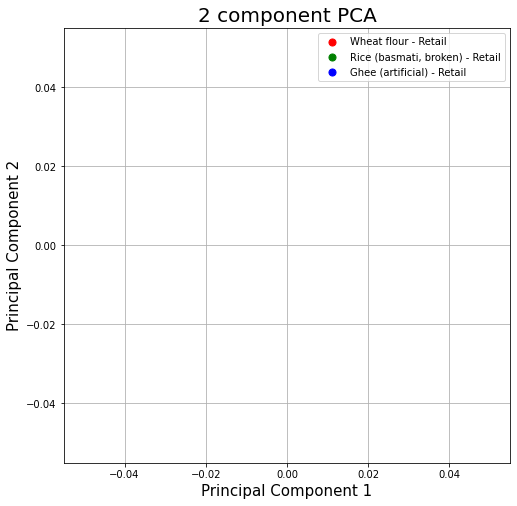

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Wheat flour - Retail', 'Rice (basmati, broken) - Retail', 'Ghee (artificial) - Retail']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['price'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [23]:
pca.explained_variance_ratio_

array([0.35065854, 0.20353515])

In [ ]:
#X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, Y, test_size=0.3, random_state=3)

In [ ]:
#from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import confusion_matrix
#LR = LogisticRegression(C=0.01, solver='lbfgs')
#LR.fit(X_trainset,y_trainset)
#yhat = LR.predict(X_testset)
#print("Accuracy: ", metrics.accuracy_score(y_testset, yhat))

Accuracy:  0.06916050456720313


In [ ]:
#from sklearn.metrics import classification_report
#print(classification_report(y_testset, yhat))

              precision    recall  f1-score   support

           0       0.07      1.00      0.13        52
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2
          21       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          25       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         3
          34       0.00      0.00      0.00         1
          35       0.00      0.00      0.00         1
          37       0.00      0.00      0.00         1
          38       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         1
          42       0.00      0.00      0.00         5
          48       0.00      0.00      0.00         1
          49       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#from sklearn.metrics import confusion_matrix
#print(confusion_matrix(y_testset, yhat))

[[52  0  0 ...  0  0  0]
 [ 2  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
